In [1]:
import os
import pandas as pd
import numpy as np
from auditory_cortex.analyses import Correlations
from auditory_cortex import saved_corr_dir, results_dir
from auditory_cortex.neural_data.normalizer import Normalizer

import matplotlib.pylab as plt
%matplotlib inline

### Normalizer threshold, using Gaussian and Poisson 

In [6]:
corr_obj = Correlations()



Reading existing dataframe.
Reading exisiting normalizer thresholds...


0.06011905470334845

In [8]:
corr_obj.get_normalizer_threshold(800, True)

Reading exisiting normalizer thresholds...


0.3725365276167215

In [11]:
bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for bin_width in bin_widths:
    corr_obj.get_normalizer_threshold(bin_width, False)

Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 5, num_samples: 3314...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 10, num_samples: 1658...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 20, num_samples: 832...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 40, num_samples: 419...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 60, num_samples: 281...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing n

In [2]:
norm_obj = Normalizer()
# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 500, 600, 700, 800, 900, 1000]
bin_widths = [1000]
# spike_rates = [10, 30, 50, 70, 90, 150, 200, 400]
spike_rates = [50]

threshold_g = []
threshold_poissons = {spr: [] for spr in spike_rates}
for bin_width in bin_widths:
    threshold_g.append(norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0])
    for spike_rate in spike_rates:
        threshold_poissons[spike_rate].append(
            norm_obj.compute_normalizer_threshold_using_poisson(
                bin_width=bin_width, spike_rate=spike_rate)[0]
        )


Reading existing dataframe.
Computing null distribution for bin_width: 1000, num_samples: 10...
Poisson Process: Null distribution for bin_width: 1000, spike_rate: 50...


In [3]:
threshold_g

[0.5612760939756597]

In [4]:
threshold_poissons

{50: [0.4133631614305362]}

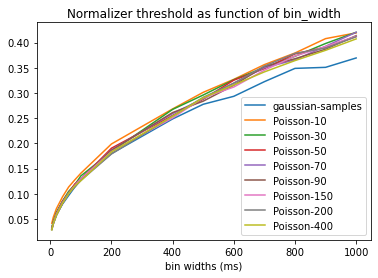

In [4]:
plt.plot(bin_widths, threshold_g, label="gaussian-samples")
for spike_rate in spike_rates:
    plt.plot(bin_widths, threshold_poissons[spike_rate], label=f"Poisson-{spike_rate}")
plt.title(f"Normalizer threshold as function of bin_width")
plt.xlabel(f"bin widths (ms)")
plt.legend(loc='best')

In [7]:
spike_rate = 50
ind = bin_widths.index(20)
threshold_poissons[spike_rate][ind]

0.06074503148578556

In [ ]:
bw_threshold = self.norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

In [8]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)

In [9]:
duration

16.550687500000002

### copying normalizers from norm_obj..

In [6]:
norm_identifier = 'modified_bins_normalizer.csv'
norm_obj = Normalizer(norm_identifier)

bin_widths = np.sort(norm_obj.dataframe['bin_width'].unique())
for bin_width in bin_widths:
    print(f"Bin_width: {bin_width}," +
        f"sessions done: {len(norm_obj.dataframe[norm_obj.dataframe['bin_width']==bin_width]['session'].unique())}")

Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Bin_width: 10.0,sessions done: 45
Bin_width: 20.0,sessions done: 45
Bin_width: 40.0,sessions done: 45
Bin_width: 60.0,sessions done: 45
Bin_width: 80.0,sessions done: 45
Bin_width: 100.0,sessions done: 45
Bin_width: 200.0,sessions done: 45
Bin_width: 300.0,sessions done: 45
Bin_width: 400.0,sessions done: 45
Bin_width: 500.0,sessions done: 45
Bin_width: 600.0,sessions done: 45
Bin_width: 700.0,sessions done: 45
Bin_width: 800.0,sessions done: 45


In [4]:
norm_identifier = 'modified_bins_normalizer_10.csv'
norm_obj_to_copy = Normalizer(norm_identifier)
bin_widths = np.sort(norm_obj_to_copy.dataframe['bin_width'].unique())
for bin_width in bin_widths:
    print(f"Bin_width: {bin_width}," +
        f"sessions done: {len(norm_obj_to_copy.dataframe[norm_obj_to_copy.dataframe['bin_width']==bin_width]['session'].unique())}")

Creating normalizer object from: modified_bins_normalizer_10.csv
Reading existing dataframe.
Bin_width: 10.0,sessions done: 45


In [5]:
# ## copy data from other files...
# norm_identifier = 'modified_bins_normalizer_10.csv'
# norm_obj_to_copy = Normalizer(norm_identifier)
# updated = norm_obj.write_data(norm_obj_to_copy.dataframe, norm_obj.filepath)

Creating normalizer object from: modified_bins_normalizer_10.csv
Reading existing dataframe.
Result updated...!


In [5]:
len(norm_obj.dataframe[norm_obj.dataframe['bin_width']==1000]['session'].unique())

45

In [20]:
import torch

Y = torch.randn((100,200))
Y_hat = torch.randn((100,200))

def correlation_loss(Y_hat, Y):

    N = Y.shape[1]

    Y_std = torch.std(Y, dim=0)
    Y_hat_std = torch.std(Y_hat, dim=0)
    inners = torch.matmul((Y - torch.mean(Y, dim=0)).T, (Y_hat - torch.mean(Y_hat, dim=0)))/N
    corr = torch.diag(inners)/torch.sqrt(Y_std*Y_hat_std)
    corr = torch.clip(corr, min=0, max=1)

    return torch.mean(corr)

In [24]:
import torch.nn.functional as F
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = F.cosine_similarity(input1, input2)
print(output)

tensor([ 0.0226,  0.0894,  0.0574,  0.0232,  0.0642, -0.0350, -0.0265,  0.1378,
        -0.0264, -0.0587,  0.0617,  0.0092, -0.1176, -0.0760,  0.0279, -0.1325,
        -0.0825, -0.1252,  0.0609,  0.0444,  0.0675,  0.0904, -0.0100, -0.0731,
        -0.1256, -0.0999,  0.0260,  0.0416, -0.0959,  0.0655, -0.1053, -0.0359,
         0.0515, -0.0510, -0.1624,  0.0662,  0.1786, -0.0577, -0.0724,  0.0150,
        -0.0626, -0.0603, -0.0403, -0.0292, -0.1211,  0.0101,  0.0317,  0.0113,
        -0.0603, -0.1113, -0.0906, -0.1579,  0.0565, -0.0051, -0.1050,  0.0817,
         0.0398, -0.0543, -0.0355, -0.0573,  0.0144, -0.1224, -0.0163, -0.1686,
        -0.1016, -0.0307,  0.0005,  0.0178,  0.0253,  0.1265,  0.0678, -0.1454,
        -0.1359,  0.0128,  0.0720,  0.1946,  0.1287, -0.0147,  0.0245, -0.1048,
        -0.1409,  0.0252, -0.0740, -0.0779, -0.0615,  0.0540, -0.0399, -0.1266,
        -0.0074,  0.0023,  0.1495,  0.0012, -0.0892,  0.0025,  0.0458, -0.1142,
        -0.0498, -0.0283,  0.0737, -0.01

In [25]:
output.shape

torch.Size([100])

Computing null distribution for bin_width: 5, num_samples: 3314...
Computing null distribution for bin_width: 10, num_samples: 1658...
Computing null distribution for bin_width: 20, num_samples: 832...
Computing null distribution for bin_width: 40, num_samples: 419...
Computing null distribution for bin_width: 60, num_samples: 281...
Computing null distribution for bin_width: 80, num_samples: 213...
Computing null distribution for bin_width: 100, num_samples: 170...
Computing null distribution for bin_width: 200, num_samples: 85...
Computing null distribution for bin_width: 400, num_samples: 45...
Computing null distribution for bin_width: 800, num_samples: 24...


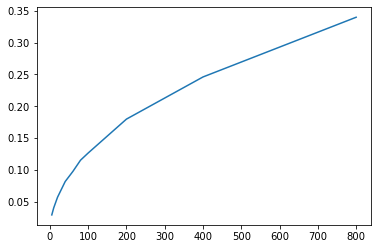

In [37]:
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bw_threshold = {}
for bin_width in bin_widths:
    bw_threshold[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

plt.plot(bw_threshold.keys(), bw_threshold.values())

In [ ]:
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bw_threshold = {}
for bin_width in bin_widths:
    bw_threshold[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

plt.plot(bw_threshold.keys(), bw_threshold.values())

compute_normalizer_threshold_using_poisson

In [7]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)
spike_rate = 40

bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
# bin_widths = [20]

thresholds = {}
total_spikes = spike_rate * duration
# for bin_width in bin_widths:
bin_width = 20
bins = int(np.ceil(round(1000*duration/bin_width, 3)))
null_dist = []
for i in range(1000):
    spike_times_1 = np.random.uniform(0, duration, int(total_spikes))
    counts_1,_ = np.histogram(spike_times_1, bins)

    spike_times_2 = np.random.uniform(0, duration, int(total_spikes))
    counts_2, _ = np.histogram(spike_times_2, bins)

    null_dist.append(np.corrcoef(counts_1, counts_2)[0,1])

thresholds[bin_width] = np.percentile(null_dist, 95)

In [18]:
thresholds = {}

In [31]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)
spike_rate = 400
total_spikes = spike_rate * duration
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
# bin_widths = [20]


null_dists = {}
for bin_width in bin_widths:
    bins = int(np.ceil(round(1000*duration/bin_width, 3)))
    null_dist = []
    for i in range(1000):
        spike_times_1 = np.random.uniform(0, duration, int(total_spikes))
        counts_1,_ = np.histogram(spike_times_1, bins)

        spike_times_2 = np.random.uniform(0, duration, int(total_spikes))
        counts_2, _ = np.histogram(spike_times_2, bins)

        null_dist.append(np.corrcoef(counts_1, counts_2)[0,1])
    null_dists[bin_width] = null_dist

    
    thresholds[spike_rate]= {bin_width: np.percentile(null_dist, 95)}

In [17]:
thresholds[40]

0.08089956786707451

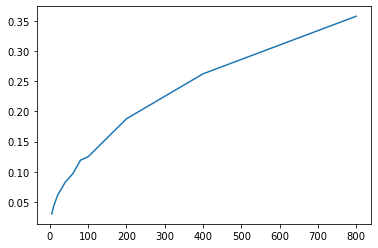

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())

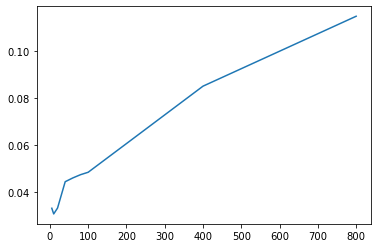

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())

(array([  6.,  27.,  83., 163., 201., 240., 182.,  69.,  23.,   6.]),
 array([-0.10289736, -0.08206092, -0.06122449, -0.04038805, -0.01955162,
         0.00128482,  0.02212125,  0.04295769,  0.06379412,  0.08463056,
         0.10546699]),
 <BarContainer object of 10 artists>)

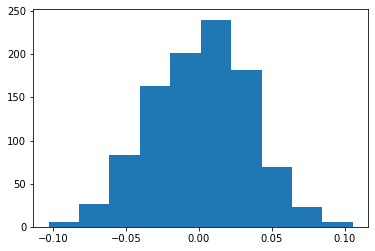

In [15]:
import matplotlib.pylab as plt
%matplotlib inline
bin_width = 20
plt.hist(null_dists[bin_width])

(array([  4.,  17.,  78., 168., 263., 250., 137.,  65.,  16.,   2.]),
 array([-0.11077022, -0.0874779 , -0.06418557, -0.04089325, -0.01760092,
         0.00569141,  0.02898373,  0.05227606,  0.07556838,  0.09886071,
         0.12215303]),
 <BarContainer object of 10 artists>)

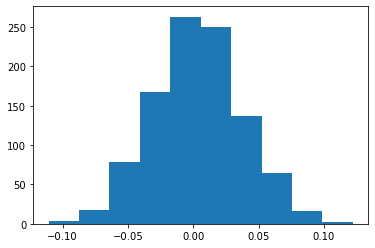

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

plt.hist(null_dist)

In [6]:
np.percentile(null_dist, 95)

0.06084282840706959

In [44]:
bins

828

In [45]:
counts

array([2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 4, 1, 0, 1, 2, 1, 3, 0, 1,
       1, 0, 4, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 1, 0, 3, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 3, 0, 1, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       4, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 5, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3,

In [16]:
session = 200206
bin_width = 20
delay = 0

dataset = norm_obj._get_dataset_obj(session)
all_repeated_trials = dataset.get_repeated_trials(
            sents=norm_obj.metadata.test_sent_IDs, bin_width=bin_width,
            delay=delay
            )

Loading Neural data for session: 200206 ... Done.


In [29]:
all_repeated_trials[0,:70,43].sum()

23.0

In [ ]:
from auditory_cortex

In [19]:
model_name = 'wave2letter_modified'
model_name_full = model_name
id = 'sampling_rate_opt_neural_delay'
model_name_full = model_name_full + '_' + id
corr_obj = Correlations(model_name=model_name_full)

Reading existing dataframe.


In [21]:
corr_obj.get_selected_data([180807], bin_width=200, delay=0, layer=0)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type
154224,180807.0,0.0,0.0,200.0,0.0,0.0,0.037082,0.109398,500.0,0.0,conv
154225,180807.0,0.0,1.0,200.0,0.0,0.0,0.234885,0.453179,500.0,5.0,conv
154226,180807.0,0.0,2.0,200.0,0.0,0.0,0.339241,0.339308,500.0,0.0,conv
154227,180807.0,0.0,3.0,200.0,0.0,0.0,0.304311,0.253618,500.0,0.0,conv
154228,180807.0,0.0,4.0,200.0,0.0,0.0,0.387910,0.222875,500.0,0.0,conv
154229,180807.0,0.0,5.0,200.0,0.0,0.0,0.252644,0.066257,500.0,30.0,conv
154230,180807.0,0.0,6.0,200.0,0.0,0.0,0.024976,0.026751,500.0,45.0,conv
154231,180807.0,0.0,7.0,200.0,0.0,0.0,0.412596,0.289013,500.0,0.0,conv
154232,180807.0,0.0,8.0,200.0,0.0,0.0,0.405631,0.314603,500.0,5.0,conv
154233,180807.0,0.0,9.0,200.0,0.0,0.0,-0.090580,-0.019528,500.0,95.0,conv


In [22]:
corr_obj.get_selected_data([180807], bin_width=20, delay=0, layer=1)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type
2896,180807.0,1.0,0.0,20.0,0.0,0.0,0.077897,0.109398,500.0,100.0,conv
2897,180807.0,1.0,1.0,20.0,0.0,0.0,0.248638,0.453179,500.0,30.0,conv
2898,180807.0,1.0,2.0,20.0,0.0,0.0,0.364426,0.339308,500.0,30.0,conv
2899,180807.0,1.0,3.0,20.0,0.0,0.0,0.333674,0.253618,500.0,0.0,conv
2900,180807.0,1.0,4.0,20.0,0.0,0.0,0.244013,0.222875,500.0,10.0,conv
2901,180807.0,1.0,5.0,20.0,0.0,0.0,0.035791,0.066257,500.0,100.0,conv
2902,180807.0,1.0,6.0,20.0,0.0,0.0,0.029460,0.026751,500.0,95.0,conv
2903,180807.0,1.0,7.0,20.0,0.0,0.0,0.207863,0.289013,500.0,35.0,conv
2904,180807.0,1.0,8.0,20.0,0.0,0.0,0.172783,0.314603,500.0,45.0,conv
2905,180807.0,1.0,9.0,20.0,0.0,0.0,-0.024887,-0.019528,500.0,95.0,conv


In [23]:
corr_obj.set_normalizers()

Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...

In [25]:
corr_obj.get_selected_data([180807], bin_width=200, delay=0, layer=1)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type,normalized_test_cc
154240,180807.0,1.0,0.0,200.0,0.0,0.0,0.230532,0.293915,500.0,0.0,conv,0.425226
154241,180807.0,1.0,1.0,200.0,0.0,0.0,0.362544,0.661228,500.0,0.0,conv,0.445846
154242,180807.0,1.0,2.0,200.0,0.0,0.0,0.419270,0.632566,500.0,0.0,conv,0.527158
154243,180807.0,1.0,3.0,200.0,0.0,0.0,0.356665,0.553605,500.0,0.0,conv,0.479358
154244,180807.0,1.0,4.0,200.0,0.0,0.0,0.355660,0.554582,500.0,0.0,conv,0.477586
154245,180807.0,1.0,5.0,200.0,0.0,0.0,0.126037,0.105827,500.0,45.0,conv,0.387436
154246,180807.0,1.0,6.0,200.0,0.0,0.0,0.133075,0.063051,500.0,45.0,conv,0.529971
154247,180807.0,1.0,7.0,200.0,0.0,0.0,0.412822,0.549643,500.0,0.0,conv,0.556830
154248,180807.0,1.0,8.0,200.0,0.0,0.0,0.358899,0.625393,500.0,0.0,conv,0.453833
154249,180807.0,1.0,9.0,200.0,0.0,0.0,-0.007944,-0.032578,500.0,95.0,conv,NaN


In [8]:
bin_widths = corr_obj.data['bin_width'].unique()
bin_width = bin_widths[0]
for bin_width in bin_widths:
    select_data = corr_obj.get_selected_data(bin_width=bin_width)
    sessions = select_data['session'].unique()
    delays = select_data['delay'].unique()
    for session in sessions:
        for delay in delays:
            select_data = corr_obj.get_selected_data(
                sessions=[session], bin_width=bin_width, delay=delay
            )
            channels = select_data['channel'].unique()
            selected_normalizers = norm_obj.get_normalizer_for_session(
                session=session, bin_width=bin_width, delay=delay
                )
            for ch in channels:
                ids = select_data[select_data['channel']==ch].index
                ch_normalizer = selected_normalizers[
                        selected_normalizers['channel']==ch
                    ]['normalizer'].head(1).item()
                corr_obj.data.loc[ids, 'normalizer'] = ch_normalizer

In [7]:
session = 200206
bin_width = 20
delay = 0
selected_normalizers = norm_obj.get_normalizer_for_session( session=session, bin_width=bin_width, delay=delay)

In [11]:
ch = 0
selected_normalizers[selected_normalizers['channel']==ch]['normalizer'].head(1).item()

0.1830396695361907

In [14]:
import numpy as np
corr_obj.data.loc[:, 'new'] = np.nan



In [15]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc,layer_type,new
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.005700,500.0,NaN,conv,NaN
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.064661,500.0,0.484152,conv,NaN
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.031331,500.0,0.705792,conv,NaN
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.012075,500.0,0.315256,conv,NaN
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.001426,500.0,NaN,conv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
115135,191121.0,11.0,58.0,20.0,0.0,0.044128,-0.004785,0.003896,500.0,-0.076667,conv,NaN
115136,191121.0,11.0,59.0,20.0,0.0,0.184508,0.161731,0.173512,500.0,0.388266,conv,NaN
115137,191121.0,11.0,60.0,20.0,0.0,0.037813,0.016685,0.002105,500.0,0.363661,conv,NaN
115138,191121.0,11.0,61.0,20.0,0.0,0.037623,-0.000563,0.000737,500.0,-0.020756,conv,NaN


In [10]:
channels = select_data['channel'].unique()
            for ch in channels:
                ids = select_data[select_data['channel'] == ch].index

                norm = data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 

                data1.loc[ids, 'normalizer'] = norm

### Normalizer threshold for each bin_width...

In [13]:
norm_obj = Normalizer()

Reading existing dataframe.


In [14]:
norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

Computing null distribution for bin_width: 800, num_samples: 24...


0.3330899522657686

In [3]:
bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
thresholds = {}
for bin_width in bin_widths:
    thresholds[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

Computing null distribution for bin_width: 5, num_samples: 3314...
Computing null distribution for bin_width: 10, num_samples: 1658...
Computing null distribution for bin_width: 20, num_samples: 832...
Computing null distribution for bin_width: 40, num_samples: 419...
Computing null distribution for bin_width: 60, num_samples: 281...
Computing null distribution for bin_width: 80, num_samples: 213...
Computing null distribution for bin_width: 100, num_samples: 170...
Computing null distribution for bin_width: 200, num_samples: 85...
Computing null distribution for bin_width: 400, num_samples: 45...
Computing null distribution for bin_width: 800, num_samples: 24...


Text(0, 0.5, '$\\rho$')

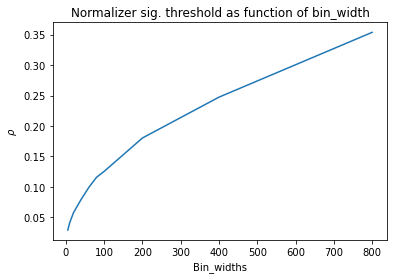

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())
plt.title(f"Normalizer sig. threshold as function of bin_width")
plt.xlabel("Bin_widths")
plt.ylabel("$\\rho$")

In [11]:
thresholds[20]

0.05659032798002723

In [4]:
bin_width = 800
p_value = 5


sent_IDs = norm_obj.metadata.test_sent_IDs
total_samples_test_set = 0
for sent in sent_IDs:
    total_samples_test_set += norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

print(f"Computing null distribution for bin_width: {bin_width}")
null_dist = []
for i in range(10000):
    gaussian_sample_of_same_length = np.random.randn(2, total_samples_test_set)
    null_dist.append(np.corrcoef(gaussian_sample_of_same_length)[0,1])

q = 100 - p_value
np.percentile(null_dist, q)


Computing null distribution for bin_width: 800


0.3408717501985366

In [ ]:
import 
for sent in sent_IDs:
    total_samples_test_set += norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

print(f"Computing null distribution for bin_width: {bin_width}")
null_dist = []
for i in range(10000):
    gaussian_sample_of_same_length = np.random.randn(2, total_samples_test_set)
    null_dist.append(np.corrcoef(gaussian_sample_of_same_length)[0,1])

q = 100 - p_value
np.percentile(null_dist, q)


In [ ]:
norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

Text(0.5, 1.0, 'Null distribution at bin_width: 800')

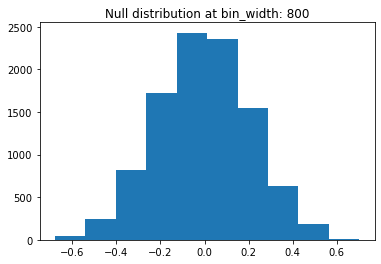

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

plt.hist(null_dist)
plt.title(f"Null distribution at bin_width: {bin_width}")

In [10]:
length_of_samples = 24
random_samples = np.random.randn(2, length_of_samples)
np.corrcoef(random_samples)

array([[1.        , 0.11475796],
       [0.11475796, 1.        ]])

### rest of the code...

In [2]:
from auditory_cortex.neural_data.normalizer import Normalizer

norm_obj = Normalizer()

Reading existing dataframe.


In [8]:
norm = norm_obj.get_normalizer_for_session(180807)

In [9]:
norm

,session,channel,bin_width,delay,normalizer
16,180807.0,0.0,20.0,0.0,0.109266
17,180807.0,1.0,20.0,0.0,0.452635
18,180807.0,2.0,20.0,0.0,0.338900
19,180807.0,3.0,20.0,0.0,0.253313
20,180807.0,4.0,20.0,0.0,0.222607
21,180807.0,5.0,20.0,0.0,0.066178
22,180807.0,6.0,20.0,0.0,0.026719
23,180807.0,7.0,20.0,0.0,0.288665
24,180807.0,8.0,20.0,0.0,0.314225
25,180807.0,9.0,20.0,0.0,-0.019504


In [10]:
norm_200

,session,channel,bin_width,delay,normalizer
1660,180807.0,0.0,200.0,0.0,0.293915
1661,180807.0,1.0,200.0,0.0,0.661228
1662,180807.0,2.0,200.0,0.0,0.632566
1663,180807.0,3.0,200.0,0.0,0.553605
1664,180807.0,4.0,200.0,0.0,0.554582
1665,180807.0,5.0,200.0,0.0,0.105827
1666,180807.0,6.0,200.0,0.0,0.063051
1667,180807.0,7.0,200.0,0.0,0.549643
1668,180807.0,8.0,200.0,0.0,0.625393
1669,180807.0,9.0,200.0,0.0,-0.032578


In [7]:
norm_200 = norm_obj.get_normalizer_for_session(180807, bin_width=200)
norm_200

,session,channel,bin_width,delay,normalizer
1660,180807.0,0.0,200.0,0.0,0.293915
1661,180807.0,1.0,200.0,0.0,0.661228
1662,180807.0,2.0,200.0,0.0,0.632566
1663,180807.0,3.0,200.0,0.0,0.553605
1664,180807.0,4.0,200.0,0.0,0.554582
1665,180807.0,5.0,200.0,0.0,0.105827
1666,180807.0,6.0,200.0,0.0,0.063051
1667,180807.0,7.0,200.0,0.0,0.549643
1668,180807.0,8.0,200.0,0.0,0.625393
1669,180807.0,9.0,200.0,0.0,-0.032578


In [4]:
bin_widths = norm_obj.dataframe['bin_width'].unique()
bin_widths.sort()
for bin_width in bin_widths:
    sig_sessions = norm_obj.get_significant_sessions(bin_width=bin_width)

    print(f"Significant sessions for bw-{bin_width} = {sig_sessions.shape[0]}")

Significant sessions for bw-5.0 = 9
Significant sessions for bw-10.0 = 14
Significant sessions for bw-20.0 = 17
Significant sessions for bw-40.0 = 23
Significant sessions for bw-60.0 = 24
Significant sessions for bw-80.0 = 25
Significant sessions for bw-100.0 = 25
Significant sessions for bw-200.0 = 27
Significant sessions for bw-300.0 = 38
Significant sessions for bw-400.0 = 39
Significant sessions for bw-500.0 = 39
Significant sessions for bw-600.0 = 39
Significant sessions for bw-700.0 = 39
Significant sessions for bw-800.0 = 40
Significant sessions for bw-900.0 = 39
Significant sessions for bw-1000.0 = 39


In [3]:
bin_widths = norm_obj.dataframe['bin_width'].unique()
bin_widths.sort()
for bin_width in bin_widths:
    select_data = norm_obj._get_normalizers_for_bin_width_and_delay(bin_width=bin_width)
    sessions_done = select_data['session'].unique()

    print(f"Sessions done for bw-{bin_width} = {sessions_done.shape[0]}")
    

Sessions done for bw-5.0 = 45
Sessions done for bw-10.0 = 45
Sessions done for bw-20.0 = 45
Sessions done for bw-40.0 = 45
Sessions done for bw-60.0 = 45
Sessions done for bw-80.0 = 45
Sessions done for bw-100.0 = 45
Sessions done for bw-200.0 = 45
Sessions done for bw-300.0 = 45
Sessions done for bw-400.0 = 45
Sessions done for bw-500.0 = 45
Sessions done for bw-600.0 = 45
Sessions done for bw-700.0 = 45
Sessions done for bw-800.0 = 45
Sessions done for bw-900.0 = 45
Sessions done for bw-1000.0 = 45


In [12]:
sessions = norm_obj.get_significant_sessions(threshold=0.0672)
sum = 0
for session in sessions:
    channels = norm_obj.get_good_channels(session)
    sum += channels.size

In [4]:
sum

198

In [16]:
corr_obj = Correlations('wave2letter_modified'+'_opt_neural_delay')

In [17]:
corr_sessions = corr_obj.get_significant_sessions(0.0672)

In [18]:
corr_sessions.shape

(18,)

In [19]:
corr_sessions.sort()

In [20]:
sessions.sort()

In [21]:
for i in range(18):
    print(f"corr_sess: {corr_sessions[i]}, norm_sess: {sessions[i]}")

corr_sess: 180627.0, norm_sess: 180627.0
corr_sess: 180719.0, norm_sess: 180719.0
corr_sess: 180720.0, norm_sess: 180720.0
corr_sess: 180731.0, norm_sess: 180731.0
corr_sess: 180807.0, norm_sess: 180807.0
corr_sess: 180808.0, norm_sess: 180808.0
corr_sess: 180814.0, norm_sess: 180814.0
corr_sess: 191113.0, norm_sess: 191113.0
corr_sess: 191115.0, norm_sess: 191115.0
corr_sess: 191121.0, norm_sess: 191121.0
corr_sess: 191125.0, norm_sess: 191125.0
corr_sess: 191206.0, norm_sess: 191206.0
corr_sess: 191210.0, norm_sess: 191210.0
corr_sess: 200205.0, norm_sess: 200205.0
corr_sess: 200206.0, norm_sess: 200206.0
corr_sess: 200207.0, norm_sess: 200207.0
corr_sess: 200213.0, norm_sess: 200213.0
corr_sess: 200313.0, norm_sess: 200313.0


In [5]:
norm_obj.get_significant_sessions(threshold=0.068)

array([180807., 191206., 180808., 180814.])

In [21]:
corr_obj.get_good_channels(180719, 0.068)

[1.0]

In [9]:
norm_obj.get_good_channels(180814)

array([ 9., 14., 15., 18., 20., 23., 24., 26., 27., 28., 33.])

In [121]:
select_data = norm_obj._get_normalizers_for_bin_width_and_delay()
select_data['session'].unique().shape

(10,)

In [142]:
norm_obj.dataframe[(norm_obj.dataframe['bin_width']==100) &\
    (norm_obj.dataframe['delay']==0)
]['session'].unique().shape

(0,)

In [143]:
norm_obj.dataframe

,session,channel,bin_width,delay,normalizer
0,180413.0,0.0,20.0,0.0,0.010205
1,180413.0,1.0,20.0,0.0,-0.007076
2,180413.0,2.0,20.0,0.0,0.005463
3,180413.0,3.0,20.0,0.0,-0.005638
4,180413.0,4.0,20.0,0.0,-0.023312
...,...,...,...,...,...
1934,200219.0,58.0,80.0,0.0,0.143576
1935,200219.0,59.0,80.0,0.0,-0.017678
1936,200219.0,60.0,80.0,0.0,0.011825
1937,200219.0,61.0,80.0,0.0,-0.001971


### Speedup using inner product method...

In [93]:
import numpy as np
def inter_trial_corr(spikes, n=100000):
    """Compute distribution of inter-trials correlations.

    Args: 
        spikes (ndarray): (repeats, samples/time, channels)

    Returns:
        trials_corr (ndarray): (n, channels) distribution of inter-trial correlations
    """
    trials_corr = np.zeros((n, spikes.shape[2]))
    num_channels = spikes.shape[-1]
    N = spikes.shape[1]
    for t in range(n):
        trials = np.random.choice(np.arange(0,spikes.shape[0]), size=2, replace=False)
        X1 = spikes[trials[0]].squeeze()
        X2 = spikes[trials[1]].squeeze()

        X1 = X1 - np.mean(X1, axis=0)[None,:]
        X2 = X2 - np.mean(X2, axis=0)[None,:]
        sigma_1 = np.std(X1, axis=0)
        sigma_2 = np.std(X2, axis=0)
        cov = np.matmul(X1.T, X2)/(N)
        normalizers = sigma_1[:,None]@sigma_2[None,:]
        corr_mat = cov/normalizers
        corr = np.diag(corr_mat)

        trials_corr[t] = corr
        # for ch in range(num_channels):
        #     trials_corr[t, ch] = np.corrcoef(
        #         spikes[trials[0],:,ch].squeeze(), spikes[trials[1],:,ch].squeeze()
        #         )[0,1]
    return trials_corr

dataset = norm_obj._get_dataset_obj(200206)
all_repeated_trials = dataset.get_repeated_trials(
    sents=norm_obj.metadata.test_sent_IDs, bin_width=20,
    delay=0
    )

normalizer_all = inter_trial_corr(all_repeated_trials, n=2)

# normalizer_all = Normalizer.inter_trial_corr(all_repeated_trials, n=n)
normalizer_all_med = np.median(normalizer_all, axis=0)

In [113]:
ch = 32
normalizer_all_med[ch]

0.6359058389784193

In [114]:
chann = corr_obj.get_selected_data([200206], 20, 0, channel=ch)
chann.head(1)['normalizer']

92144    0.657779
Name: normalizer, dtype: float64

In [ ]:
corr_obj = Correlations("wave2letter_modified")

92112    0.18326
Name: normalizer, dtype: float64

### back to sessions...

In [145]:
dictt = {1: 2, 12: 14}
dictt

{1: 2, 12: 14}

In [146]:
dictt.clear()

In [147]:
dictt

{}

In [18]:
select_data['session'].unique()

array([180413., 180420., 180501., 180502., 180613., 180622., 180627.,
       180717., 180719., 180720.])

In [19]:
select_data[select_data['session']==180720]

,session,channel,bin_width,delay,normalizer
144,180720.0,0.0,20.0,0.0,0.003684
145,180720.0,1.0,20.0,0.0,0.058025
146,180720.0,2.0,20.0,0.0,0.120406
147,180720.0,3.0,20.0,0.0,0.072472
148,180720.0,4.0,20.0,0.0,0.066810
149,180720.0,5.0,20.0,0.0,0.007431
150,180720.0,6.0,20.0,0.0,0.062780
151,180720.0,7.0,20.0,0.0,0.282587
152,180720.0,8.0,20.0,0.0,0.036157
153,180720.0,9.0,20.0,0.0,-0.015161


In [6]:
corr_obj = Correlations("wave2letter_modified")
corr_obj.get_significant_sessions(0.068)

array([191113., 191125., 180731., 200207., 180720., 180807., 191206.,
       191121., 191210., 180627., 200213., 200206., 200313., 191115.,
       200205., 180814., 180719., 180808.])

In [20]:
corr_obj.get_good_channels(180720, threshold=0.068)

[2.0, 3.0, 7.0]

In [10]:
norm_obj.dataframe[norm_obj.dataframe['session']== 191115]

,session,channel,bin_width,delay,normalizer
1020,191115.0,0.0,80.0,0.0,NaN
1021,191115.0,1.0,80.0,0.0,0.026289
1022,191115.0,2.0,80.0,0.0,NaN
1023,191115.0,3.0,80.0,0.0,NaN
1024,191115.0,4.0,80.0,0.0,NaN
1025,191115.0,5.0,80.0,0.0,NaN
1026,191115.0,6.0,80.0,0.0,-0.009501
1027,191115.0,7.0,80.0,0.0,0.015198
1028,191115.0,8.0,80.0,0.0,NaN
1029,191115.0,9.0,80.0,0.0,0.014136


In [9]:
corr_obj = Correlations("wave2letter_modified")
corr_obj.get_significant_sessions(0.068)

array([191113., 191125., 180731., 200207., 180720., 180807., 191206.,
       191121., 191210., 180627., 200213., 200206., 200313., 191115.,
       200205., 180814., 180719., 180808.])

In [5]:
bin_width = 20
delay = 0

sessions = norm_obj.metadata.get_all_available_sessions()
select_data = norm_obj._get_normalizers_for_bin_width_and_delay(bin_width, delay)
sessions_done = select_data['session'].unique()


In [6]:
sessions_done

array([], dtype=object)

In [7]:
import numpy as np
sessions_remaining = sessions[np.isin(sessions, sessions_done, invert=True)]

In [9]:
sessions_remaining.shape

(45,)

In [10]:
sessions.shape

(45,)

In [6]:
if res.shape[0] ==0:
    

0

In [3]:
norm_dist = norm.compute_normalizer(200206, n=10)

Loading Neural data for session: 200206 ... Done.


In [4]:
norm_dist.size

64

In [5]:
import numpy as np
session = 200206
bin_width = 20
delay = 0

In [6]:
num_channels = norm_dist.size
data = np.stack([
    session*np.ones(num_channels),
    np.arange(num_channels),
    bin_width*np.ones(num_channels),
    delay*np.ones(num_channels),
    norm_dist
], axis=1
)

In [9]:
df = pd.DataFrame(
    data= data,
    columns=norm.dataframe.columns,
                  )

In [14]:
norm.dataframe = pd.concat([norm.dataframe, df], axis=0, ignore_index=True)

In [15]:
norm.dataframe

,session,channel,bin_width,delay,normalizer
0,200206.0,0.0,20.0,0.0,0.173893
1,200206.0,1.0,20.0,0.0,0.1897
2,200206.0,2.0,20.0,0.0,0.109464
3,200206.0,3.0,20.0,0.0,0.411408
4,200206.0,4.0,20.0,0.0,0.134697
...,...,...,...,...,...
59,200206.0,59.0,20.0,0.0,0.4973
60,200206.0,60.0,20.0,0.0,0.55358
61,200206.0,61.0,20.0,0.0,0.434416
62,200206.0,62.0,20.0,0.0,0.48853


In [11]:
df

,session,channel,bin_width,delay,normalizer
0,200206.0,0.0,20.0,0.0,0.173893
1,200206.0,1.0,20.0,0.0,0.189700
2,200206.0,2.0,20.0,0.0,0.109464
3,200206.0,3.0,20.0,0.0,0.411408
4,200206.0,4.0,20.0,0.0,0.134697
...,...,...,...,...,...
59,200206.0,59.0,20.0,0.0,0.497300
60,200206.0,60.0,20.0,0.0,0.553580
61,200206.0,61.0,20.0,0.0,0.434416
62,200206.0,62.0,20.0,0.0,0.488530


In [6]:
df

,session,channel,bin_width,delay,normalizer


In [8]:
filename = "wave2letter_modified_normalizer2_corr_results.csv"
normalizer_file = os.path.join(saved_corr_dir, filename)
data = pd.read_csv(normalizer_file)

In [10]:
saved_corr_dir

'/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations'

In [9]:
data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays
0,180420.0,0.0,0.0,20.0,0.0,0.036105,-0.007360,-0.006940,499.0,0.0
1,180420.0,0.0,1.0,20.0,0.0,0.046602,-0.016293,-0.024175,499.0,0.0
2,180420.0,0.0,2.0,20.0,0.0,0.045748,-0.016081,-0.024135,499.0,0.0
3,180420.0,0.0,3.0,20.0,0.0,0.046712,-0.011621,-0.024589,499.0,0.0
4,180420.0,0.0,4.0,20.0,0.0,0.045727,-0.011520,-0.024368,499.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3833,180501.0,1.0,11.0,20.0,0.0,0.063529,0.016588,-0.012557,499.0,0.0
3834,180501.0,1.0,12.0,20.0,0.0,0.073001,0.018319,-0.013108,499.0,0.0
3835,180501.0,1.0,13.0,20.0,0.0,0.073247,0.019468,-0.022472,499.0,0.0
3836,180501.0,1.0,14.0,20.0,0.0,0.073651,0.018012,-0.013134,499.0,0.0


In [2]:
corr_obj = Correlations("wave2letter_modified_normalizer2")

In [4]:
corr_obj.data[corr_obj.data['session']==200206]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,normalized_test_cc
3354,200206.0,0.0,0.0,20.0,0.0,0.093445,0.071359,0.183260,499.0,0.0,0.166692
3355,200206.0,0.0,1.0,20.0,0.0,0.054043,0.013222,0.221996,499.0,0.0,0.028063
3356,200206.0,0.0,2.0,20.0,0.0,0.038743,0.003472,0.139223,499.0,0.0,0.009306
3357,200206.0,0.0,3.0,20.0,0.0,0.085172,0.041210,0.413683,499.0,0.0,0.064072
3358,200206.0,0.0,4.0,20.0,0.0,0.077916,0.061912,0.122561,499.0,0.0,0.176847
...,...,...,...,...,...,...,...,...,...,...,...
3477,200206.0,1.0,59.0,20.0,0.0,0.391983,0.372889,0.506141,499.0,0.0,0.524135
3478,200206.0,1.0,60.0,20.0,0.0,0.361155,0.341689,0.579529,499.0,0.0,0.448842
3479,200206.0,1.0,61.0,20.0,0.0,0.214622,0.170872,0.445747,499.0,0.0,0.255933
3480,200206.0,1.0,62.0,20.0,0.0,0.369474,0.340756,0.550849,499.0,0.0,0.459120


### rest of the code..

In [ ]:
import numpy as np
from auditory_cortex.dataset import NeuralData
from auditory_cortex import utils, config, results_dir

import seaborn as sns
import matplotlib.pylab as plt
def plot_medians(norm_dist, ch):
    normalizer_medians = []
    normalizer_dev = []
    num_sents_list = []
    for k,v in norm_dist.items():
        normalizer_medians.append(np.median(v[:,ch]))
        normalizer_dev.append(np.std(v[:,ch]))
        num_sents_list.append(k)
    plt.plot(num_sents_list, normalizer_medians)
    # sns.lineplot(x=num_sents_list, y=normalizer_medians, errorbar=normalizer_dev)
    plt.title(f"Median normalizers: session-{session}, ch-{ch}")

def compute_normalizer_dist(dataset, num_sents=5, n_itr = 10000, bin_width = 20, delay=0):
    """Compute distribution of normalizer using given number of 
    sents (having repeated trials)"""
    sents = np.array([12,13,32,43,56,163,212,218,287,308])
    if num_sents > sents.size:
        num_sents = sents.size
        print(f"At max {num_sents} sents can be used.")

    sent_ids = np.random.choice(sents, size=num_sents, replace=False)
    # ids = np.random.randint(len(sents), size=num_sents)
    # sent_ids = np.array(sents)[ids]

    all_repeated_trials = dataset.get_repeated_trials(sents=sent_ids, bin_width=bin_width, delay=delay)
    normalizer_dist = utils.inter_trial_corr(all_repeated_trials, n=n_itr)

    return normalizer_dist


In [2]:
data_dir = config['neural_data_dir']
session = '200206'
dataset = NeuralData(data_dir, session)

Loading Neural data for session: 200206 ... Done.


In [3]:
normalizer_dist = {}
num_sents_list = [2,3,4,5,6,7,8,9,10]
for num_sents in num_sents_list:
    dist = compute_normalizer_dist(dataset=dataset, num_sents=num_sents)
    normalizer_dist[num_sents] = dist

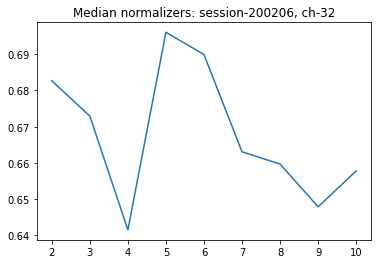

In [8]:
ch = 32
plot_medians(normalizer_dist, ch)

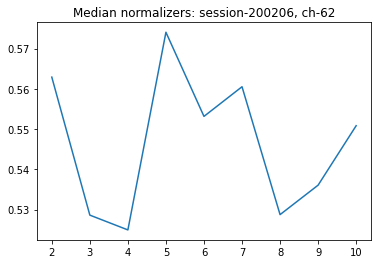

In [9]:
ch = 62
plot_medians(normalizer_dist, ch)

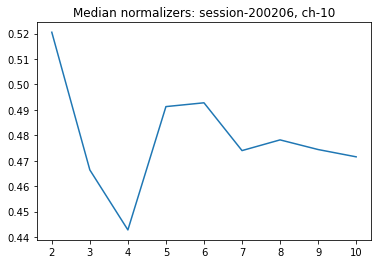

In [25]:
ch = 10
plot_medians(normalizer_dist, ch)

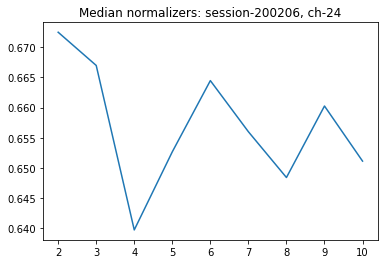

In [11]:
ch = 24
plot_medians(normalizer_dist, ch)

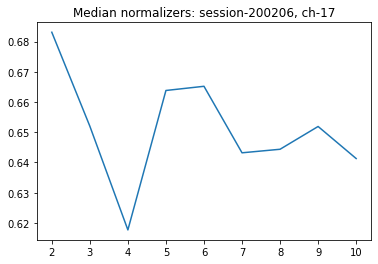

In [12]:
ch = 17
plot_medians(normalizer_dist, ch)

### save distribution...

In [15]:
import os
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
np.save(path, normalizer_dist)

### load distribution...

In [17]:
session = 200206
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
norm_dist = np.load(path, allow_pickle=True)

In [21]:
a = np.random.randn(10)
b = np.random.randn(10)

np.corrcoef(a,b)[0,1]

0.7530194152772853

In [ ]:

normalizer_medians = []
ch = 32
for k,v in normalizer_dist.items():
    normalizer_medians.append(np.median(v[:,ch]))
plt.plot(normalizer_medians)
plt.title(f"Median normalizers: session-{session}, ch-{ch}")




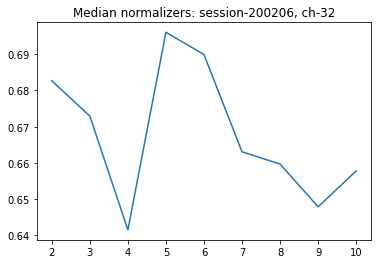

In [18]:
medians = np.median(normalizer_dist, axis=0)

In [19]:
medians[32]

0.6601224200435402